In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
import plotly.express as px
#distribucion normal
from scipy import stats
from scipy.stats import norm
from scipy.stats import zscore
#validacion cruzada
from sklearn.model_selection import cross_val_score
#svm
from sklearn.svm import SVC
#arboles
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
#sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#normalización de los datos
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#matriz de confusión
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report


In [3]:
from google.colab import files
import io
archivo=files.upload()
dataframe=pd.read_csv(io.BytesIO(archivo['ObesityDataSet_raw_and_data_sinthetic.csv']),delimiter=",")

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


In [4]:
dataframe.head(500)

Gender        Age    Height      Weight family_history_with_overweight  \
0    Female  21.000000  1.620000   64.000000                            yes   
1    Female  21.000000  1.520000   56.000000                            yes   
2      Male  23.000000  1.800000   77.000000                            yes   
3      Male  27.000000  1.800000   87.000000                             no   
4      Male  22.000000  1.780000   89.800000                             no   
..      ...        ...       ...         ...                            ...   
495    Male  19.000000  1.800000   60.000000                            yes   
496    Male  18.000000  1.720000   53.000000                            yes   
497    Male  20.000000  1.560000   45.000000                             no   
498  Female  25.196214  1.686306  104.572712                            yes   
499  Female  18.503343  1.683124  126.673780                            yes   

    FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF  TUE  \
0     no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.0   
1     no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.0   
2     no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.0   
3     no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.0   
4     no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.0   
..   ...   ...  ...        ...   ...       ...  ...       ...  ...   
495  yes   3.0  1.0     Always    no  1.000000  yes  0.000000  0.0   
496  yes   2.0  3.0  Sometimes    no  2.000000   no  0.000000  2.0   
497   no   2.0  3.0  Sometimes    no  2.000000   no  1.000000  1.0   
498  yes   3.0  3.0  Sometimes    no  1.152736   no  0.319156  1.0   
499  yes   3.0  3.0  Sometimes    no  1.115967   no  1.541072  1.0   

           CALC                 MTRANS           NObeyesdad  
0            no  Public_Transportation        Normal_Weight  
1     Sometimes  Public_Transportation        Normal_Weight  
2    Frequently  Public_Transportation        Normal_Weight  
3    Frequently                Walking   Overweight_Level_I  
4     Sometimes  Public_Transportation  Overweight_Level_II  
..          ...                    ...                  ...  
495          no              Motorbike        Normal_Weight  
496   Sometimes  Public_Transportation  Insufficient_Weight  
497   Sometimes  Public_Transportation        Normal_Weight  
498   Sometimes  Public_Transportation     Obesity_Type_III  
499   Sometimes  Public_Transportation     Obesity_Type_III  

[500 rows x 17 columns]

In [ ]:
#Datos Faltantes
valores_nulos = dataframe.isnull().sum()

print(valores_nulos)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
dataframe.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [ ]:
for columna in dataframe.columns:
    conteo_valores = dataframe[columna].value_counts()
    print(f"Variable '{columna}':")
    print(conteo_valores)
    print(f"Número de valores únicos en '{columna}': {len(conteo_valores)}")
    print("-" * 40)

Variable 'Gender':
Male      1068
Female    1043
Name: Gender, dtype: int64
Número de valores únicos en 'Gender': 2
----------------------------------------
Variable 'Age':
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: Age, Length: 1402, dtype: int64
Número de valores únicos en 'Age': 1402
----------------------------------------
Variable 'Height':
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: Height, Length: 1574, dtype: int64
Número de valores únicos en 'Height': 1574
----------------------------------------
Variable 'Weight':
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: 

In [35]:
encoderGender=LabelEncoder()
dataframe["Gender"]=encoderGender.fit_transform(dataframe["Gender"])

encoderFamily=LabelEncoder()
dataframe["family_history_with_overweight"]=encoderFamily.fit_transform(dataframe["family_history_with_overweight"])

encoderFAVC=LabelEncoder()
dataframe["FAVC"]=encoderFAVC.fit_transform(dataframe["FAVC"])

encoderCAEC=LabelEncoder()
dataframe["CAEC"]=encoderCAEC.fit_transform(dataframe["CAEC"])

encoderSMOKE=LabelEncoder()
dataframe["SMOKE"]=encoderSMOKE.fit_transform(dataframe["SMOKE"])

encoderCALC=LabelEncoder()
dataframe["CALC"]=encoderCALC.fit_transform(dataframe["CALC"])

encoderCALC=LabelEncoder()
dataframe["SCC"]=encoderCALC.fit_transform(dataframe["SCC"])

encoderCALC=LabelEncoder()
dataframe["MTRANS"]=encoderCALC.fit_transform(dataframe["MTRANS"])

encoderNObeyesdad=LabelEncoder()
dataframe["NObeyesdad"]=encoderFAVC.fit_transform(dataframe["NObeyesdad"])


dataframe.head(10)

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   
5       1  29.0    1.62    53.0                               0     1   2.0   
6       0  23.0    1.50    55.0                               1     1   3.0   
7       1  22.0    1.64    53.0                               0     0   2.0   
8       1  24.0    1.78    64.0                               1     1   3.0   
9       1  22.0    1.72    68.0                               1     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  
5  3.0     2      0   2.0    0  0.0  0.0     2       0           1  
6  3.0     2      0   2.0    0  1.0  0.0     2       2           1  
7  3.0     2      0   2.0    0  3.0  0.0     2       3           1  
8  3.0     2      0   2.0    0  1.0  1.0     1       3           1  
9  3.0     2      0   2.0    0  1.0  1.0     3       3           1

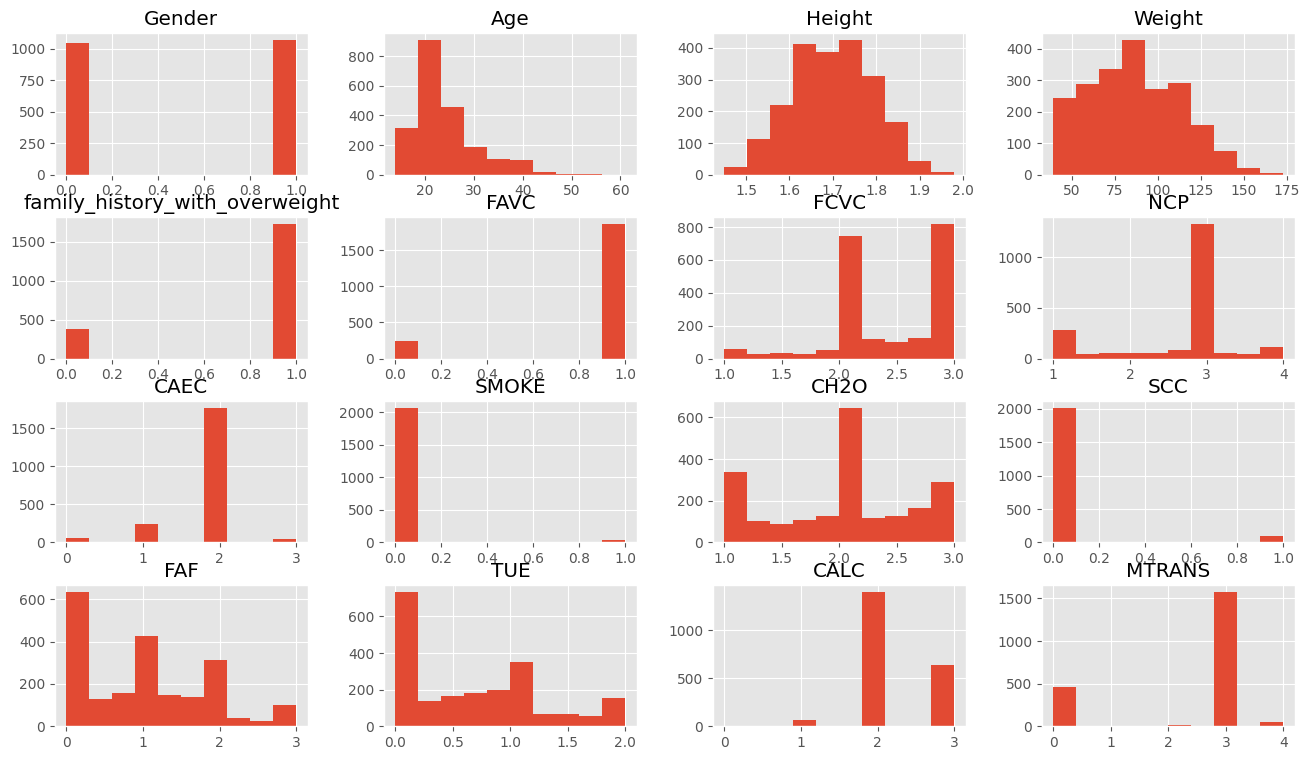

In [ ]:
#Histogramas
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

dataframe.drop(["NObeyesdad"],axis=1).hist()
plt.show()

In [ ]:
#Diagrama de Caja
fig1 = px.box(dataframe['Age'], y="Age", width = 600, height=400)
fig2 = px.box(dataframe['Height'], y="Height", width = 600, height=400)
fig3 = px.box(dataframe['Weight'], y="Weight", width = 600, height=400)
fig4 = px.box(dataframe['FCVC'], y="FCVC", width = 600, height=400)
fig5 = px.box(dataframe['NCP'], y="NCP", width = 600, height=400)
fig6 = px.box(dataframe['CH2O'], y="CH2O", width = 600, height=400)
fig7 = px.box(dataframe['FAF'], y="FAF", width = 600, height=400)
fig8 = px.box(dataframe['TUE'], y="TUE", width = 600, height=400)
fig7.show()
fig8.show()
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()


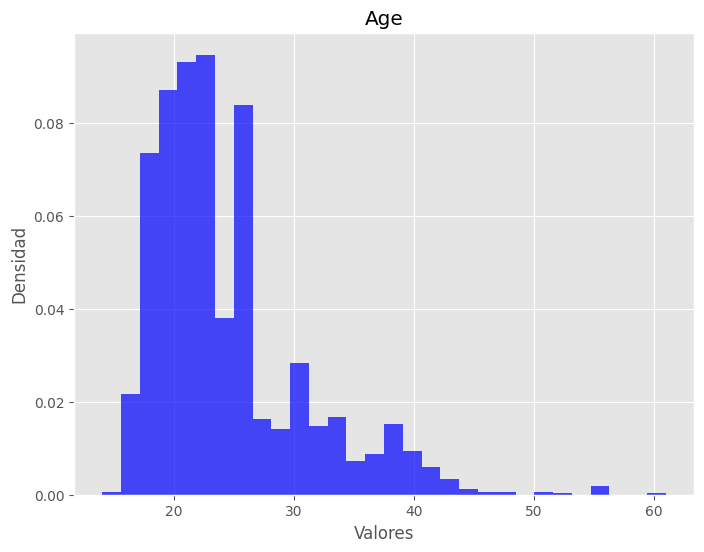

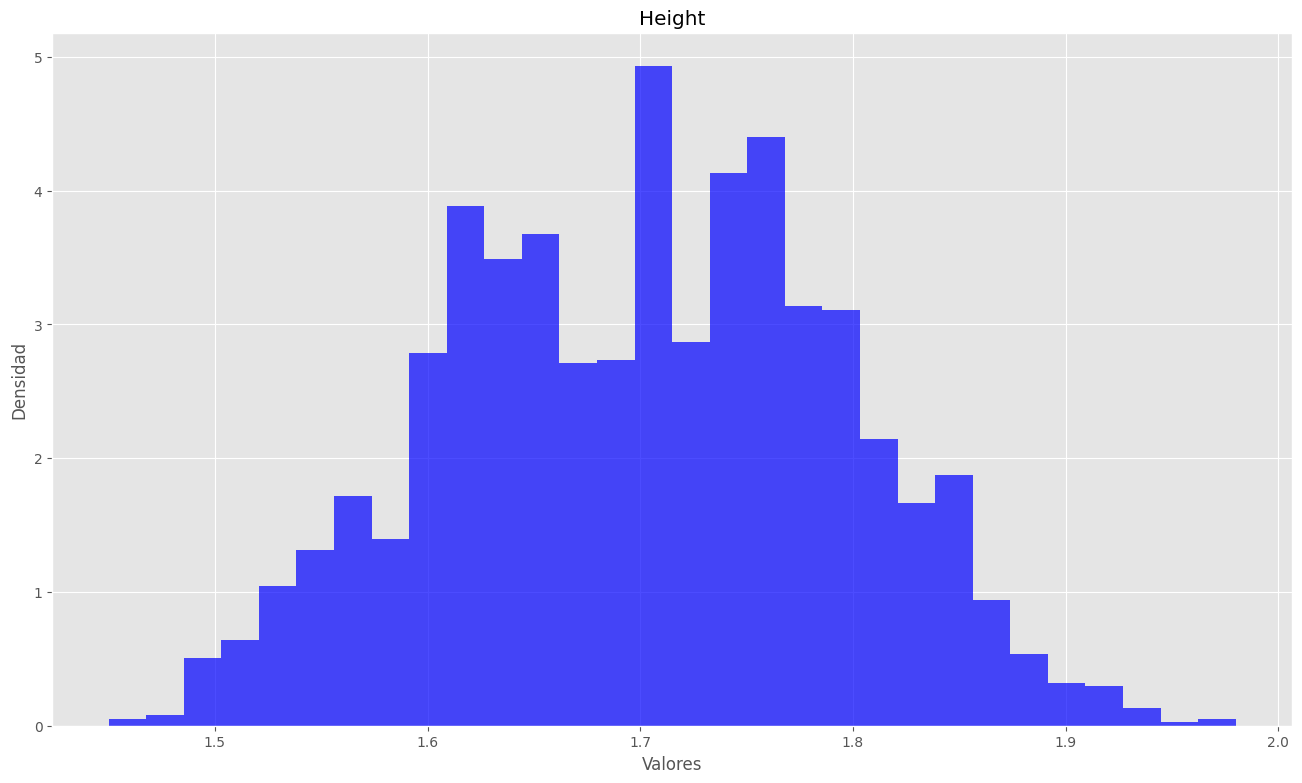

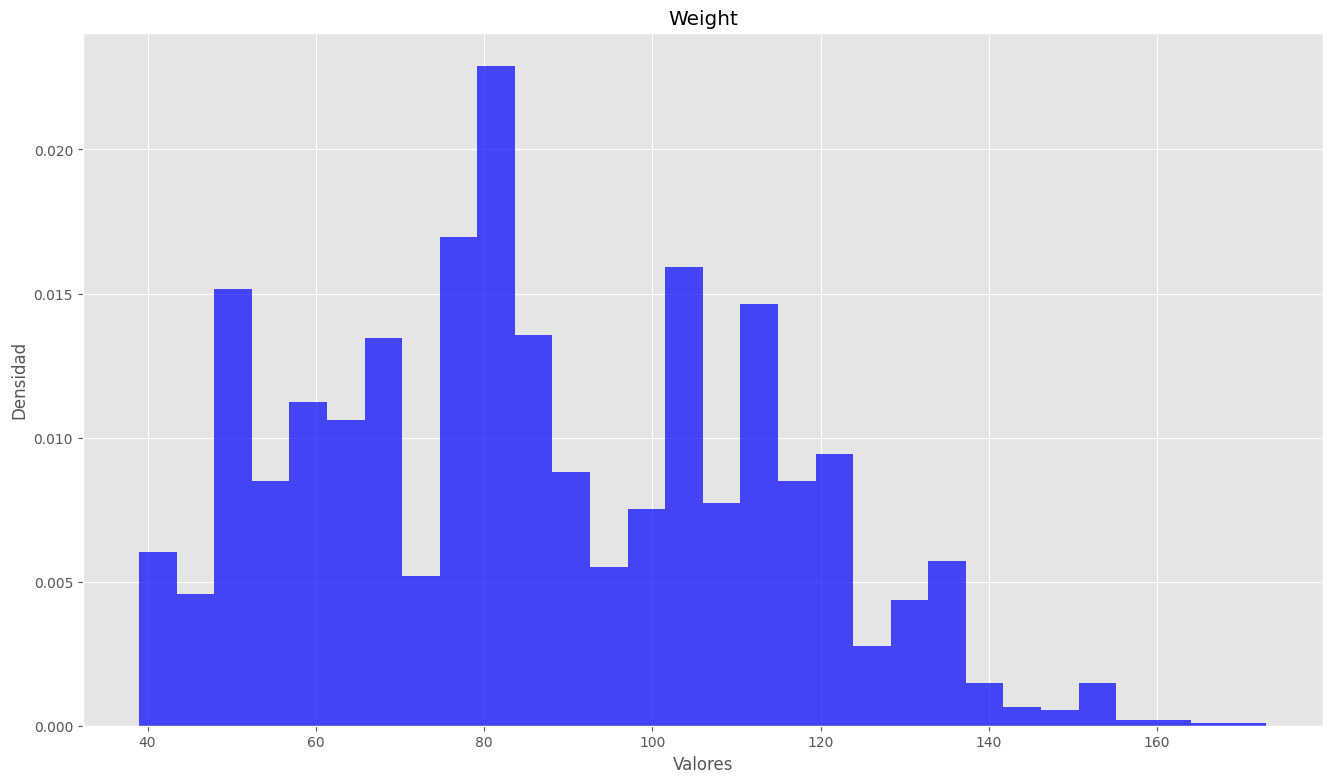

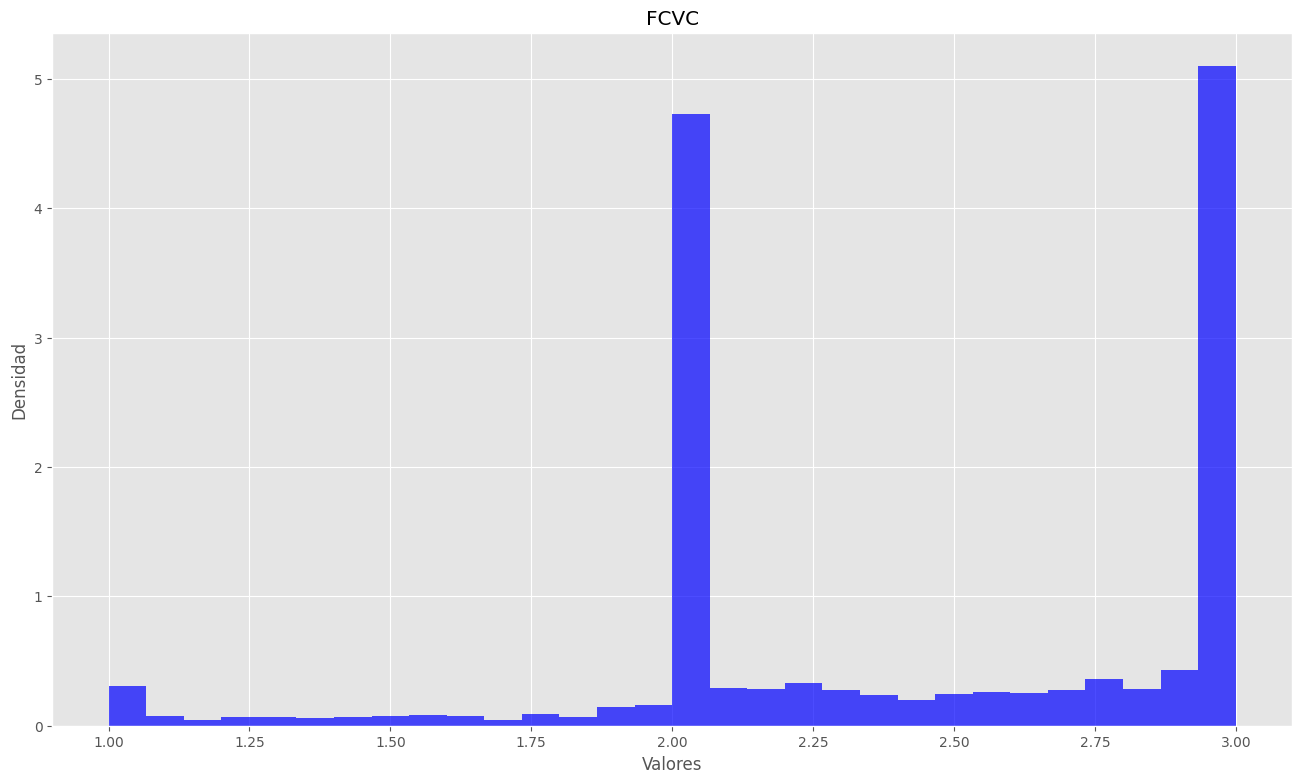

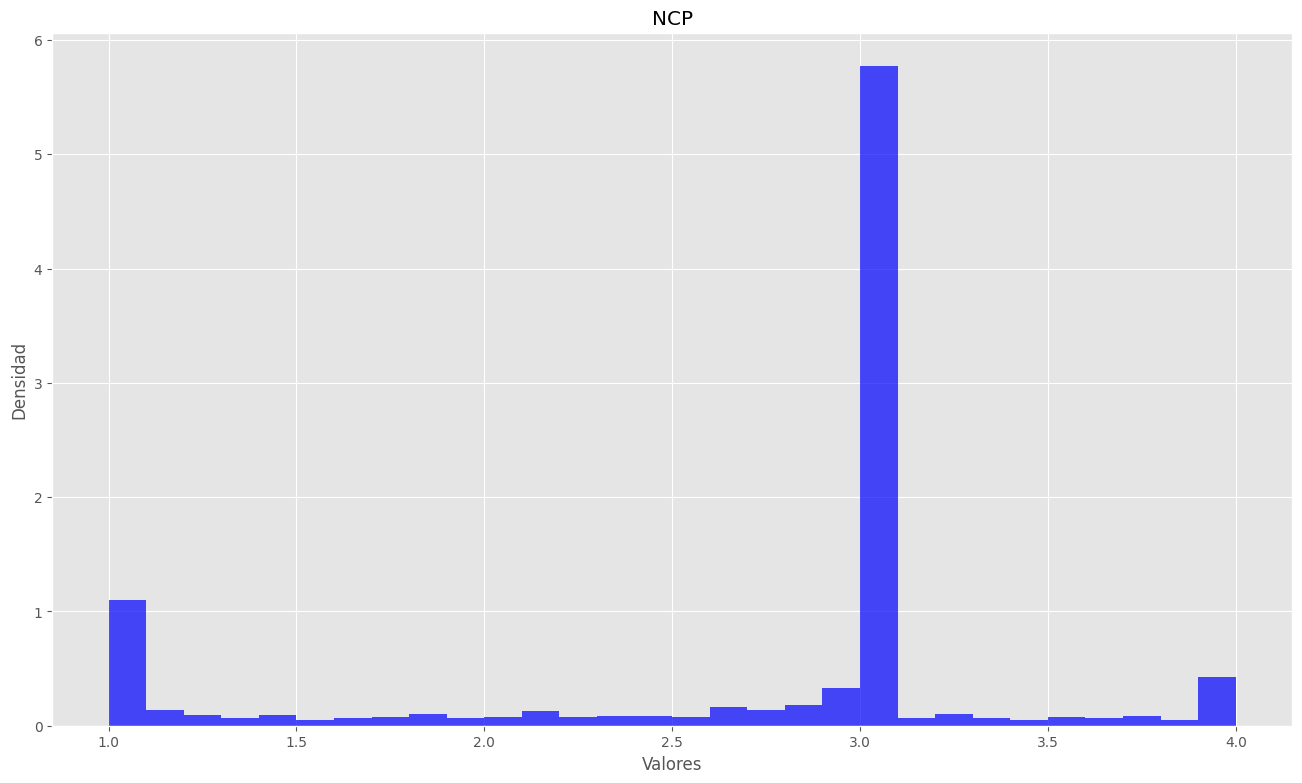

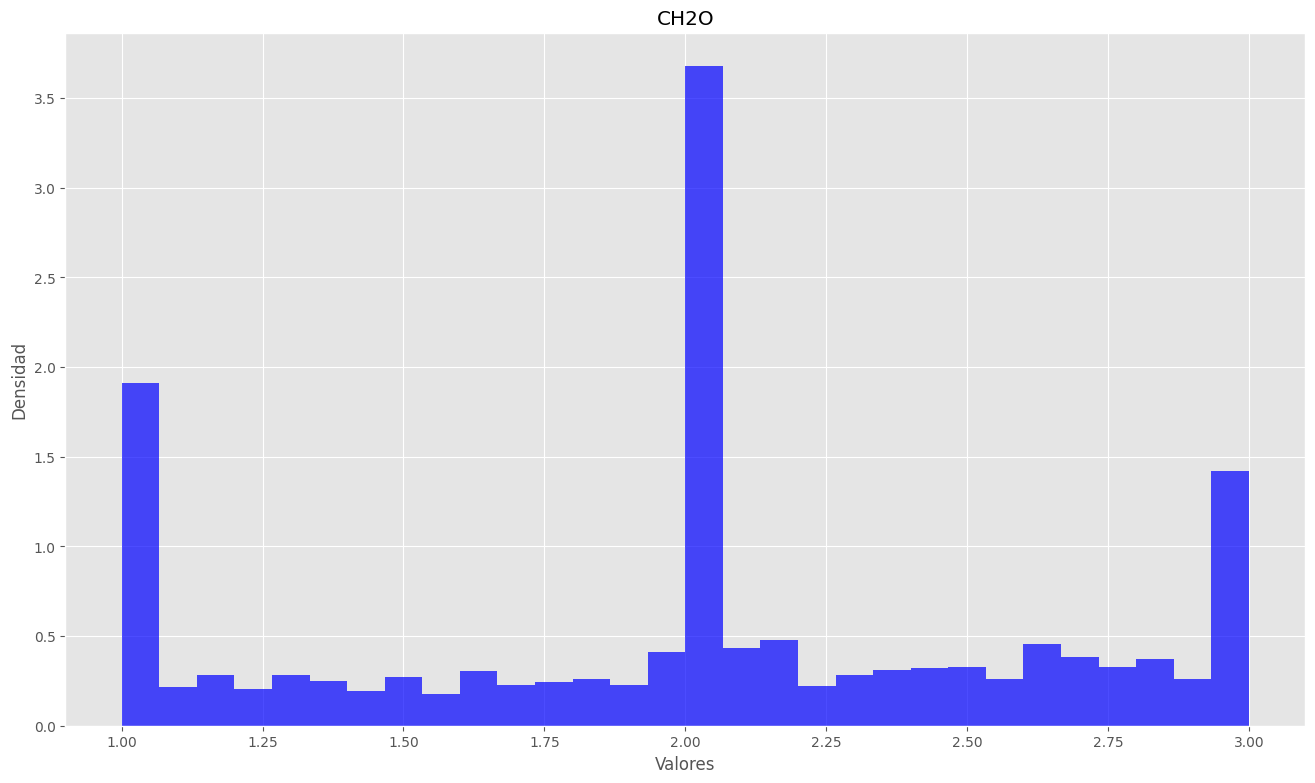

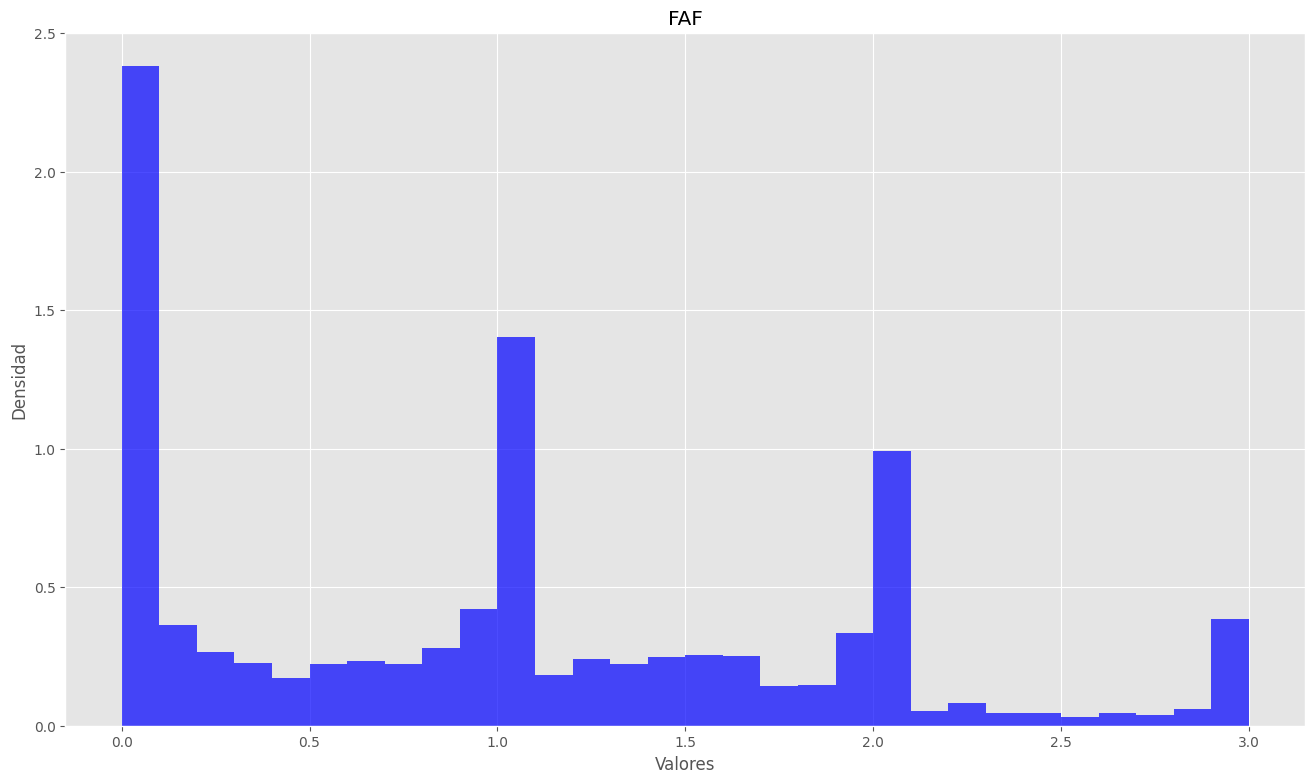

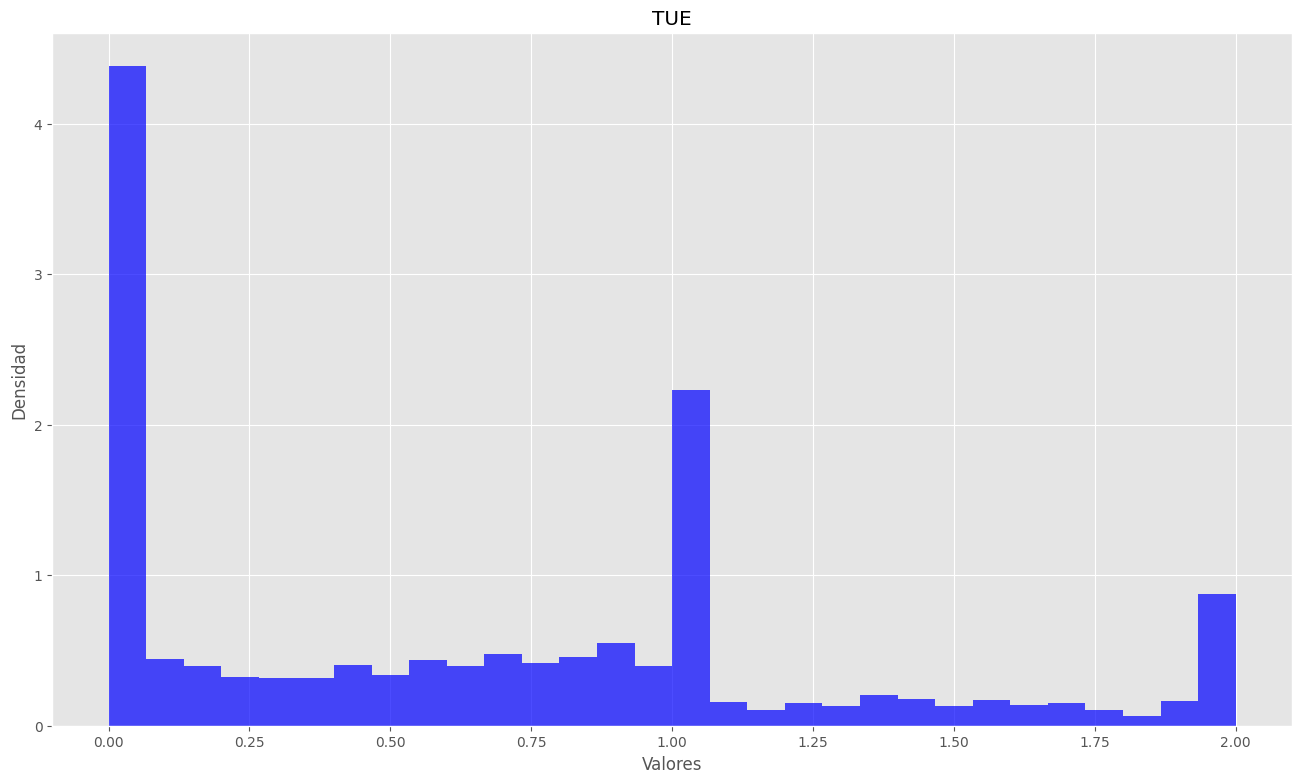

In [ ]:
#Densidad
plt.figure(figsize=(8, 6))
plt.title("Age")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.hist(dataframe['Age'], density=True, bins=30, alpha=0.7, color='b')
plt.show()
plt.title("Height")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.hist(dataframe['Height'], density=True, bins=30, alpha=0.7, color='b')
plt.show()
plt.title("Weight")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.hist(dataframe['Weight'], density=True, bins=30, alpha=0.7, color='b')
plt.show()
plt.title("FCVC")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.hist(dataframe['FCVC'], density=True, bins=30, alpha=0.7, color='b')
plt.show()
plt.title("NCP")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.hist(dataframe['NCP'], density=True, bins=30, alpha=0.7, color='b')
plt.show()
plt.title("CH2O")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.hist(dataframe['CH2O'], density=True, bins=30, alpha=0.7, color='b')
plt.show()
plt.title("FAF")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.hist(dataframe['FAF'], density=True, bins=30, alpha=0.7, color='b')
plt.show()
plt.title("TUE")
plt.xlabel("Valores")
plt.ylabel("Densidad")
plt.hist(dataframe['TUE'], density=True, bins=30, alpha=0.7, color='b')
plt.show()

In [ ]:
# Calcular media y límites
mean_alturas = np.mean(dataframe['Age'])
std_alturas = np.std(dataframe['Age'])
lim_inf = mean_alturas - 3*std_alturas
lim_sup = mean_alturas + 3*std_alturas

# Dibujar distribución y superponer los límites
fig = px.histogram(dataframe['Age'], x='Age', width=800, height=400)
fig.add_vline(x=mean_alturas, line_color='black', annotation_text='$\mu$')
fig.add_vline(x=lim_inf, line_color='red', annotation_text='$\mu-3\sigma$')
fig.add_vline(x=lim_sup, line_color='red', annotation_text='$\mu+3\sigma$')
fig.show()

# Calcular media y límites
mean_alturas = np.mean(dataframe['Height'])
std_alturas = np.std(dataframe['Height'])
lim_inf = mean_alturas - 3*std_alturas
lim_sup = mean_alturas + 3*std_alturas

# Dibujar distribución y superponer los límites
fig = px.histogram(dataframe['Height'], x='Height', width=800, height=400)
fig.add_vline(x=mean_alturas, line_color='black', annotation_text='$\mu$')
fig.add_vline(x=lim_inf, line_color='red', annotation_text='$\mu-3\sigma$')
fig.add_vline(x=lim_sup, line_color='red', annotation_text='$\mu+3\sigma$')
fig.show()

# Calcular media y límites
mean_alturas = np.mean(dataframe['Weight'])
std_alturas = np.std(dataframe['Weight'])
lim_inf = mean_alturas - 3*std_alturas
lim_sup = mean_alturas + 3*std_alturas

# Dibujar distribución y superponer los límites
fig = px.histogram(dataframe['Weight'], x='Weight', width=800, height=400)
fig.add_vline(x=mean_alturas, line_color='black', annotation_text='$\mu$')
fig.add_vline(x=lim_inf, line_color='red', annotation_text='$\mu-3\sigma$')
fig.add_vline(x=lim_sup, line_color='red', annotation_text='$\mu+3\sigma$')
fig.show()


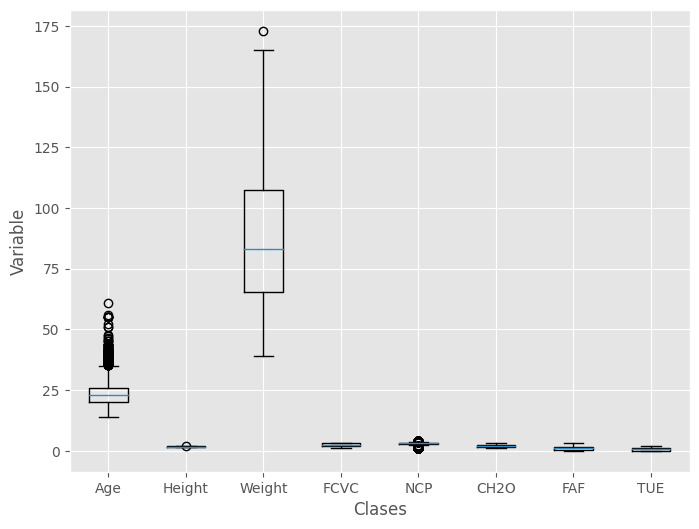

In [ ]:
# Crear un diagrama de caja
plt.figure(figsize=(8, 6))
plt.boxplot([dataframe['Age'], dataframe['Height'],dataframe['Weight'],dataframe['FCVC'],dataframe['NCP'],dataframe['CH2O'],dataframe['FAF'],dataframe['TUE']], labels=['Age', 'Height','Weight','FCVC','NCP','CH2O','FAF','TUE'])
plt.xlabel('Clases')
plt.ylabel('Variable')
plt.show()

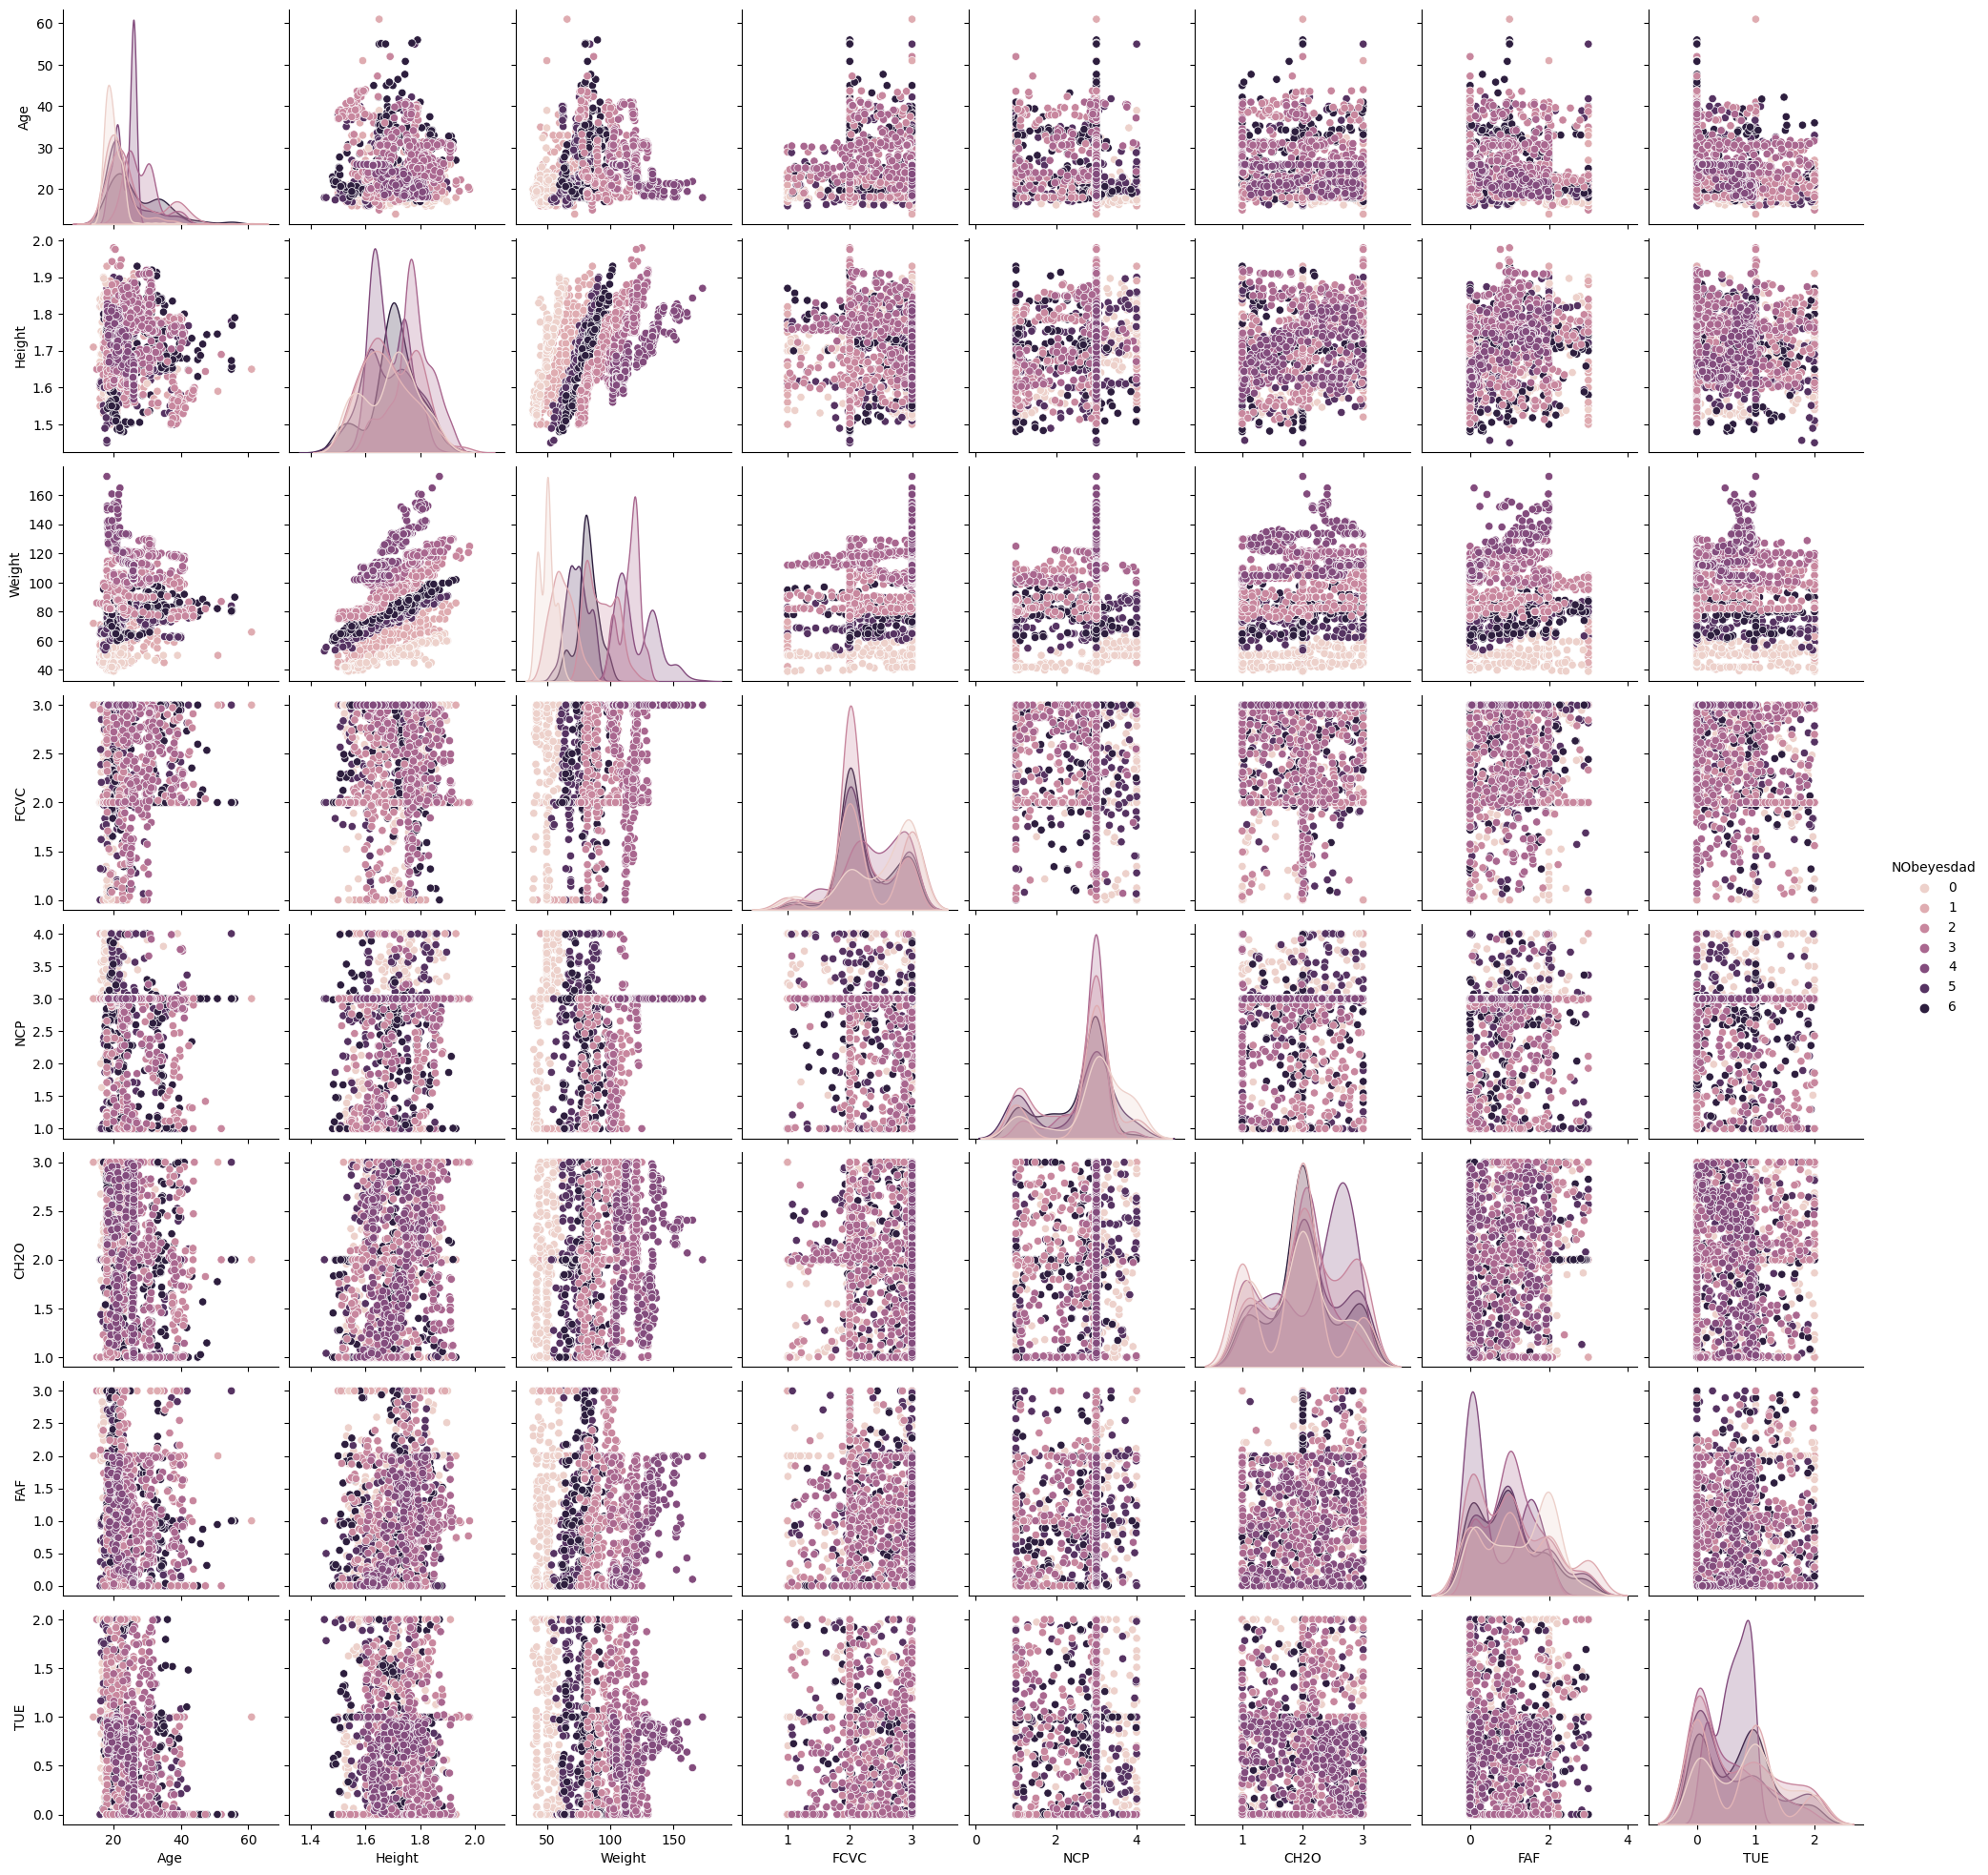

In [27]:
sb.pairplot(dataframe,vars=['Age', 'Height','Weight','FCVC','NCP','CH2O','FAF','TUE'],hue='NObeyesdad')
plt.savefig("pairplot.jpg")
plt.show()

<Axes: title={'center': 'Correlación de características'}>

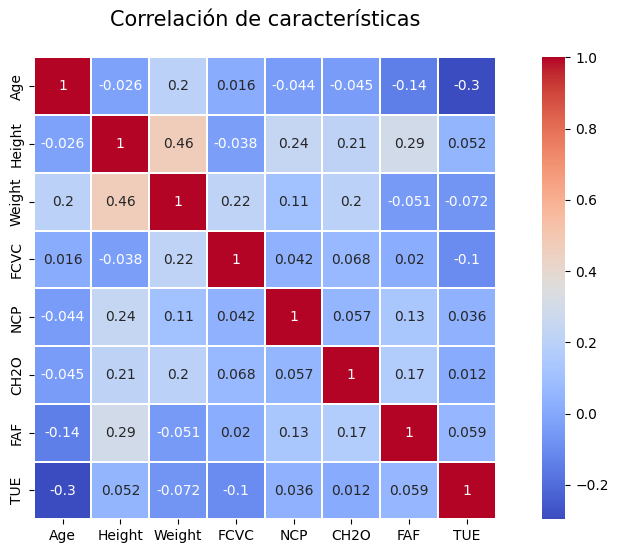

In [15]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(12,6))
plt.title('Correlación de características', y=1.05, size=15)
sb.heatmap(dataframe.drop(['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE',"SCC",'CALC',"MTRANS",'NObeyesdad'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
for columna in dataframe.columns:
    conteo_valores = dataframe[columna].value_counts()
    print(f"Variable '{columna}':")
    print(conteo_valores)
    print(f"Número de valores únicos en '{columna}': {len(conteo_valores)}")
    print("-" * 40)

print(np.array(dataframe['NObeyesdad']))

Variable 'Gender':
1    1068
0    1043
Name: Gender, dtype: int64
Número de valores únicos en 'Gender': 2
----------------------------------------
Variable 'Age':
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: Age, Length: 1402, dtype: int64
Número de valores únicos en 'Age': 1402
----------------------------------------
Variable 'Height':
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: Height, Length: 1574, dtype: int64
Número de valores únicos en 'Height': 1574
----------------------------------------
Variable 'Weight':
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: Weight, Le

In [37]:

X = dataframe.drop(["NObeyesdad"],axis=1)
y = dataframe['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)

nFeatures = 8
sfs = SFS(knn,
          k_features=nFeatures,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy'
          )
sfs.fit(X_train, y_train)

print("\n")
print("Características seleccionadas:")
print(sfs.k_feature_idx_)



[2023-10-15 18:39:08] Features: 1/8 -- score: 0.6309963353183692
[2023-10-15 18:39:09] Features: 2/8 -- score: 0.7962139257901969
[2023-10-15 18:39:10] Features: 3/8 -- score: 0.8253229500687128
[2023-10-15 18:39:12] Features: 4/8 -- score: 0.8402153000458086
[2023-10-15 18:39:13] Features: 5/8 -- score: 0.8517224003664682
[2023-10-15 18:39:14] Features: 6/8 -- score: 0.8611887311039853
[2023-10-15 18:39:15] Features: 7/8 -- score: 0.865267979844251



Características seleccionadas:
(0, 1, 2, 3, 7, 10, 13, 14)



[2023-10-15 18:39:16] Features: 8/8 -- score: 0.8672995877233165

SVM CON TODAS LAS VARIABLES

Accuracy = 0.9598108747044918
[[54  0  0  0  0  0  0]
 [ 1 52  0  0  0  6  0]
 [ 0  0 61  1  0  0  3]
 [ 0  0  0 57  0  0  0]
 [ 0  0  0  1 62  0  0]
 [ 0  2  0  0  0 68  2]
 [ 0  0  1  0  0  0 52]]
Precision: [0.98181818 0.96296296 0.98387097 0.96610169 1.         0.91891892
 0.9122807 ]
Recall: [1.         0.88135593 0.93846154 1.         0.98412698 0.94444444
 0.98113208]
F1 Score: [0.99082569 0.92035398 0.96062992 0.98275862 0.992      0.93150685
 0.94545455]
Support: [54 59 65 57 63 72 53]
              precision    recall  f1-score   support

           0      0.982     1.000     0.991        54
           1      0.963     0.881     0.920        59
           2      0.984     0.938     0.961        65
           3      0.966     1.000     0.983        57
           4      1.000     0.984     0.992        63
           5      0.919     0.944     0.932        72
           6      0.912     0.981     0.945        53

    accuracy                          0.960       423
   macro avg

<Axes: >

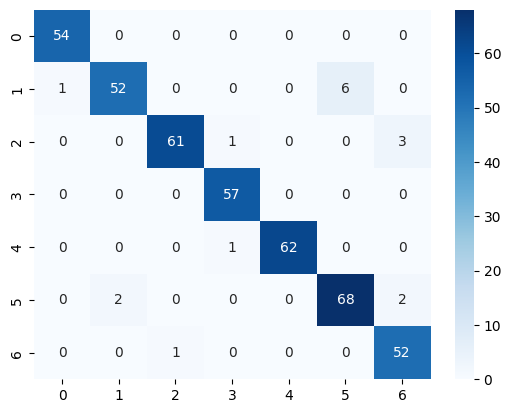

In [156]:
X = dataframe.drop(["NObeyesdad"],axis=1)
y = dataframe['NObeyesdad']

XTrain, XTest, yTrain, yTest=train_test_split(X,y,test_size=0.2,random_state=6)
escalador=RobustScaler()
XTrain=escalador.fit_transform(np.array(XTrain))
XTest=escalador.transform(np.array(XTest))

modelo=SVC(kernel='linear')
modelo.fit(np.array(XTrain),np.array(yTrain))
yPredict=modelo.predict(np.array(XTest))
print("Accuracy =",metrics.accuracy_score(np.array(yTest),np.array(yPredict)))
matriz=confusion_matrix(np.array(yTest),np.array(yPredict))
print(matriz)

from sklearn.metrics import precision_recall_fscore_support, classification_report

# Calcular precision, recall, fscore y support
precision, recall, fscore, support = precision_recall_fscore_support(yTest, yPredict, average=None)

# Mostrar los resultados con más decimales
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", fscore)
print("Support:", support)

# Mostrar el informe de clasificación con más decimales
target_names = ['0', '1', '2', '3', '4', '5', '6']
print(classification_report(yTest, yPredict, target_names=target_names, digits=3))

scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy') #cv is cross validation
print(scores)
print("Promedio de puntajes ",scores.mean())

sb.heatmap(matriz,annot=True,cmap="Blues")

SVM CON VARIABLES SELECCIONADAS POR SFS

Accuracy = 0.9456264775413712
[[54  0  0  0  0  0  0]
 [ 2 46  0  0  0 11  0]
 [ 0  0 64  1  0  0  0]
 [ 0  0  0 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  1  0  0  0 67  4]
 [ 0  0  1  0  0  3 49]]
Precision: [0.96428571 0.9787234  0.98461538 0.98275862 1.         0.82716049
 0.9245283 ]
Recall: [1.         0.77966102 0.98461538 1.         1.         0.93055556
 0.9245283 ]
F1 Score: [0.98181818 0.86792453 0.98461538 0.99130435 1.         0.87581699
 0.9245283 ]
Support: [54 59 65 57 63 72 53]
              precision    recall  f1-score   support

           0      0.964     1.000     0.982        54
           1      0.979     0.780     0.868        59
           2      0.985     0.985     0.985        65
           3      0.983     1.000     0.991        57
           4      1.000     1.000     1.000        63
           5      0.827     0.931     0.876        72
           6      0.925     0.925     0.925        53

    accuracy                          0.946       423
   macro avg

<Axes: >

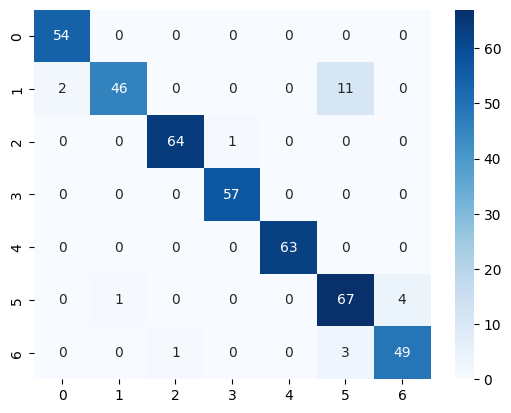

In [161]:
X = dataframe.drop(['family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SMOKE', 'SCC', 'FAF', 'MTRANS', 'NObeyesdad'],axis=1)
y = dataframe['NObeyesdad']

XTrain, XTest, yTrain, yTest=train_test_split(X,y,test_size=0.2,random_state=6)
escalador=RobustScaler()
XTrain=escalador.fit_transform(np.array(XTrain))
XTest=escalador.transform(np.array(XTest))

modelo=SVC(kernel='linear')
modelo.fit(np.array(XTrain),np.array(yTrain))
yPredict=modelo.predict(np.array(XTest))
print("Accuracy =",metrics.accuracy_score(np.array(yTest),np.array(yPredict)))
matriz=confusion_matrix(np.array(yTest),np.array(yPredict))
print(matriz)

from sklearn.metrics import precision_recall_fscore_support, classification_report

# Calcular precision, recall, fscore y support
precision, recall, fscore, support = precision_recall_fscore_support(yTest, yPredict, average=None)

# Mostrar los resultados con más decimales
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", fscore)
print("Support:", support)

# Mostrar el informe de clasificación con más decimales
target_names = ['0', '1', '2', '3', '4', '5', '6']
print(classification_report(yTest, yPredict, target_names=target_names, digits=3))

scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy') #cv is cross validation
print(scores)
print("Promedio de puntajes ",scores.mean())
sb.heatmap(matriz,annot=True,cmap="Blues")